## Best Practices for Preprocessing NLp Data

Reference: [Jon Krohn](https://github.com/the-deep-learners/TensorFlow-LiveLessons/blob/master/notebooks/natural_language_preprocessing_best_practices.ipynb)

In this notebook we improve the quality of the word vectors through preprocessing

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure

import warnings
warnings.filterwarnings("ignore")

In [2]:
# dataset 'punkt'

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[Punkt](https://www.kite.com/python/docs/nltk.punkt) tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. It must be trained on a large collection of plaintext in the target language before it can be used.

The NLTK data package includes a pre-trained Punkt tokenizer for English.

In [3]:
# additional liberaires and dependencies
import string
from nltk.corpus import stopwords
from nltk.stem.porter import *
from gensim.models.phrases import Phraser, Phrases
from keras.preprocessing.text import one_hot

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Load Data

In [5]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [6]:
from nltk.corpus import gutenberg

In [7]:
gberg_sents = gutenberg.sents()

Take a look at a pre-processed sentence


In [8]:
gberg_sents[4]

# we can see the sentence is broken into words

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [9]:
[w.lower() for w in gberg_sents[4]]

# convert all to lower case with a for loop

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [10]:
# we also want remove punctuation - we don't want these tokens
# in our vector space

stpwrds = stopwords.words('english') + list(string.punctuation)


In [11]:
stpwrds

# this is a list of stopwords - common in language but don't really contribute
# to context

# check the bottom of the list we can see the punctuation

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
# we use our stopwords list object to remove the stop words and punct.
# create a for loop

[w.lower() for w in gberg_sents[4] if w not in stpwrds]


['she',
 'youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

Stem Words

this refers to truncating words down to most important elements that contribute to the meaning.

In [13]:
# compare before and after stemming

#BEFORE see output above

stemmer = PorterStemmer()

In [14]:
[stemmer.stem(w.lower()) for w in gberg_sents[4] if w not in stpwrds]

# compare the list above...

['she',
 'youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

We can train bigrams - words that usually appear together - 'thank you', 'good bye' etc.

This creates phrases

In [15]:
# create an instance of the Phrases class

# this takes a while as it scans the corpus looking for words / phrases that appear together
phrases = Phrases(gberg_sents) # train detector


In [16]:
# create a more efficient Phraser object for transforming sentences

bigram = Phraser(phrases)


In [17]:
# count the number of bigrams and how far apart

# if the appear together - high count, high score

bigram.phrasegrams


{'two_daughters': 11.966813731181547,
 'her_sister': 17.7960829227865,
 "'_s": 31.066242737744524,
 'very_early': 11.01214147275924,
 'Her_mother': 13.529425062715127,
 'long_ago': 63.22343628984789,
 'more_than': 29.023584433996874,
 'had_been': 22.306024648925288,
 'an_excellent': 39.063874851750626,
 'Miss_Taylor': 453.75918026073305,
 'very_fond': 24.134280468850747,
 'passed_away': 12.35053642325912,
 'too_much': 31.376002029426687,
 'did_not': 11.72841621714281,
 'any_means': 14.096964108090186,
 'wedding_-': 17.4695197740113,
 'Her_father': 13.129571562488772,
 'after_dinner': 21.528548116881705,
 'self_-': 47.79018053120332,
 'sixteen_years': 107.0461671612265,
 'five_years': 40.128755673408115,
 'years_old': 54.735425236061104,
 'seven_years': 52.59411150244507,
 'each_other': 79.4168405322873,
 'a_mile': 12.783091600264584,
 'must_be': 10.229989650632808,
 'difference_between': 220.52537305244678,
 'could_not': 10.870983286982371,
 'having_been': 11.53801833156938,
 'miles_of

In [18]:
# we can see how New York is treated by the bigram

"Jon lives in New York City".split()


['Jon', 'lives', 'in', 'New', 'York', 'City']

In [19]:
bigram["Jon lives in New York City".split()]

# you can also produce trigrams - NYC for instance

['Jon', 'lives', 'in', 'New_York', 'City']

Preprocess the corpus

In [20]:
# create a list of all lower case sentences

lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w not in list(string.punctuation)])

# stopwords are being left in the training - excluding all punctuation

# will take a while to loop over all data

In [21]:
lower_sents[0:5]

# all lower case, no paunctuation

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period']]

In [22]:
lower_bigram = Phraser(Phrases(lower_sents))

# look for bigrams in our lower case list

In [23]:
# which words occur frequently?

# some bigrams are relevant, but if the occur less frequently
# we can set a threshold

lower_bigram.phrasegrams


{'two_daughters': 11.080802900992637,
 'her_sister': 16.93971298099339,
 'very_early': 10.516998773665177,
 'her_mother': 10.70812618607742,
 'long_ago': 59.22644201533601,
 'more_than': 28.529926612065935,
 'had_been': 21.583193129694834,
 'an_excellent': 37.41859680854167,
 'sixteen_years': 131.42913000977518,
 'miss_taylor': 420.4340982546865,
 'mr_woodhouse': 104.19907841850323,
 'very_fond': 24.185726346489627,
 'passed_away': 11.751473221742694,
 'too_much': 30.363090173835406,
 'did_not': 10.846196223896685,
 'any_means': 14.294148100212627,
 'after_dinner': 18.60737125272944,
 'mr_weston': 91.63290824201266,
 'five_years': 37.66428596665674,
 'years_old': 48.59909444619029,
 'seven_years': 50.3345604292756,
 'each_other': 71.31277029783762,
 'well_informed': 14.185028016786626,
 'a_mile': 11.700110753652233,
 'difference_between': 207.86784241868986,
 'mrs_weston': 180.6778969011602,
 'could_not': 10.213333164207082,
 'having_been': 10.723750443105281,
 'sixteen_miles': 105.040

In [24]:
lower_bigram["jon lives in new york city".split()]


['jon', 'lives', 'in', 'new_york', 'city']

In [25]:
# rerun our phraser and exclude pairs that happen less than 32 times
# and the scire threshold to be at least 64

lower_bigram = Phraser(Phrases(lower_sents, min_count=32, threshold=64))
lower_bigram.phrasegrams

# we can see we have a much shorter list

{'miss_taylor': 156.44059469941823,
 'mr_woodhouse': 82.04651843976633,
 'mr_weston': 75.87438262077481,
 'mrs_weston': 160.6848509325892,
 'great_deal': 93.36368125424357,
 'mr_knightley': 161.74131790625913,
 'miss_woodhouse': 229.03802722366902,
 'years_ago': 74.31594785893046,
 'mr_elton': 121.3990121932397,
 'dare_say': 89.94000515807346,
 'frank_churchill': 1316.4456593286038,
 'miss_bates': 276.3958829169252,
 'drawing_room': 84.91494947493561,
 'mrs_goddard': 143.57843432545658,
 'miss_smith': 73.03442128232508,
 'few_minutes': 204.16834974753786,
 'john_knightley': 83.03755747111268,
 'don_t': 250.30957446808512,
 'good_natured': 88.69936184891343,
 'few_moments': 107.77584531675087,
 'thousand_pounds': 166.51834523092802,
 'o_clock': 89.14789088153574,
 'jane_fairfax': 654.556591758761,
 'miss_fairfax': 196.19987447261062,
 'ma_am': 157.25846601094193,
 'mrs_elton': 93.08931456265867,
 'forty_years': 90.60220877269607,
 'cut_off': 129.60290535032792,
 'ten_thousand': 84.00099

In [26]:
# Some datasets keep stop words - "indicative of sentiment"
# No stemming - "model learns similar representations of words of the same stem when data suggests it")

clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])

In [27]:
clean_sents[6]

# we can look for bigrams

['sixteen',
 'years',
 'had',
 'miss_taylor',
 'been',
 'in',
 'mr_woodhouse',
 's',
 'family',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend',
 'very',
 'fond',
 'of',
 'both',
 'daughters',
 'but',
 'particularly',
 'of',
 'emma']

In [28]:
# could consider removing stop words or common words
clean_sents[0:5]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period']]

Run word2vec

In [29]:
# max_vocab_size can be used instead of min_count (which has increased here)

# run this on a GPU as it takes a while to load all the words into the 64D vector space

model = Word2Vec(sentences=clean_sents, vector_size=64, sg=1, window=10, min_count=10, seed=42, workers=8)
model.save('clean_gutenberg_model.w2v')

Explore Model

In [30]:
# Once the model is trained we can run this function so
# we don't need to re-train

model = gensim.models.Word2Vec.load('clean_gutenberg_model.w2v')

In [31]:
# the number of words in the vocab

word_vectors = model.wv

len(word_vectors) # down from 17k in previous notebook


10329

In [32]:
word_vectors['manners']

# returns the co-ordinates of the specified word in 64D space

array([ 0.09143635,  0.25598413,  0.3945443 , -0.18569018,  0.10833984,
        0.4879251 ,  0.41856954, -0.20666943,  0.4265761 ,  0.56176347,
       -0.2631859 , -0.26151842,  0.46252984, -0.11023027, -0.12204079,
        0.61825013, -0.21263298,  0.9771799 , -0.08723659,  0.5501633 ,
        0.39719325, -0.06142768, -0.43644363,  0.01843666,  0.05763031,
       -0.21794266, -0.07061793, -0.1690059 , -0.09094811,  0.30724868,
        0.22290319, -0.24482416, -0.24761775,  0.39108676, -0.14933863,
        0.6563028 ,  0.27825102, -0.3616637 , -0.20340607,  0.45244908,
        0.48650554, -0.25347868, -0.01463829, -0.14545743,  0.02636333,
        0.19731855,  0.5901371 , -0.34994283, -0.04216354, -0.49659595,
        0.08383381,  0.7589796 ,  0.22660115, -0.545535  , -0.3784883 ,
        0.36260077, -0.24474567, -0.15392381,  0.22223   ,  0.40897578,
        0.04283332,  0.25875434,  0.54895335,  0.3638116 ], dtype=float32)

In [33]:
# returns the words that are closests in vector distance

word_vectors.most_similar('manners')

[('principles', 0.8180885314941406),
 ('notions', 0.8128055334091187),
 ('superior', 0.8109646439552307),
 ('discipline', 0.8069494366645813),
 ('unaffected', 0.806337296962738),
 ('undoubtedly', 0.8028520941734314),
 ('disposition', 0.802494466304779),
 ('connexion', 0.8021049499511719),
 ('infinitely', 0.793255090713501),
 ('amusing', 0.7880109548568726)]

In [34]:
# manners less woman plus man

word_vectors.most_similar(positive=['manners', 'man'], negative=['woman'])

[('professional', 0.6586117744445801),
 ('sensible', 0.6458559632301331),
 ('morbid', 0.6438408493995667),
 ('position', 0.6424359083175659),
 ('scientific', 0.6409494280815125),
 ('phrases', 0.6394804120063782),
 ('serious', 0.6394099593162537),
 ('sufficiently', 0.6344661116600037),
 ('distinguished', 0.632953405380249),
 ('argument', 0.6307664513587952)]

In [35]:
base_word = input("Base word:")
less_word = input("less word:")
plus_word = input("plus_word:")

Base word:king
less word:queen
plus_word:son


In [36]:
# base_word - less_word + plus_word

word_vectors.most_similar(positive=[base_word, plus_word], negative=[less_word])


[('ruler', 0.6497370004653931),
 ('stead', 0.6477845907211304),
 ('prophet', 0.6340879201889038),
 ('david', 0.6219618320465088),
 ('jehoshaphat', 0.6217379570007324),
 ('servant', 0.6020886898040771),
 ('jeroboam', 0.5963219404220581),
 ('amon', 0.5902338624000549),
 ('nebuchadrezzar', 0.5899795889854431),
 ('birthright', 0.5887260437011719)]

Reduce word vector dimensionality

In [37]:
# reduce the dimensionality of the 64D vector space to a 2D df

tsne = TSNE(n_components=2, n_iter=1000)

words = word_vectors.index_to_key
X = [word_vectors[word] for word in words]

# Create a DataFrame with words and their corresponding vectors
X = pd.DataFrame(X, index=words)

In [38]:
# run this on a GPU



X_2d = tsne.fit_transform(X)


In [39]:
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = words

In [40]:
coords_df.head()

# this gives us the position of the word which we can plot

,x,y,token
0,-26.052467,-37.141384,the
1,-26.120087,-36.963116,and
2,-25.940107,-37.116646,of
3,-26.556511,-36.388859,to
4,-28.457663,-36.043026,a


In [41]:
coords_df.to_csv('clean_gutenberg_tsne.csv', index=False)

In [42]:
coords_df = pd.read_csv('clean_gutenberg_tsne.csv')

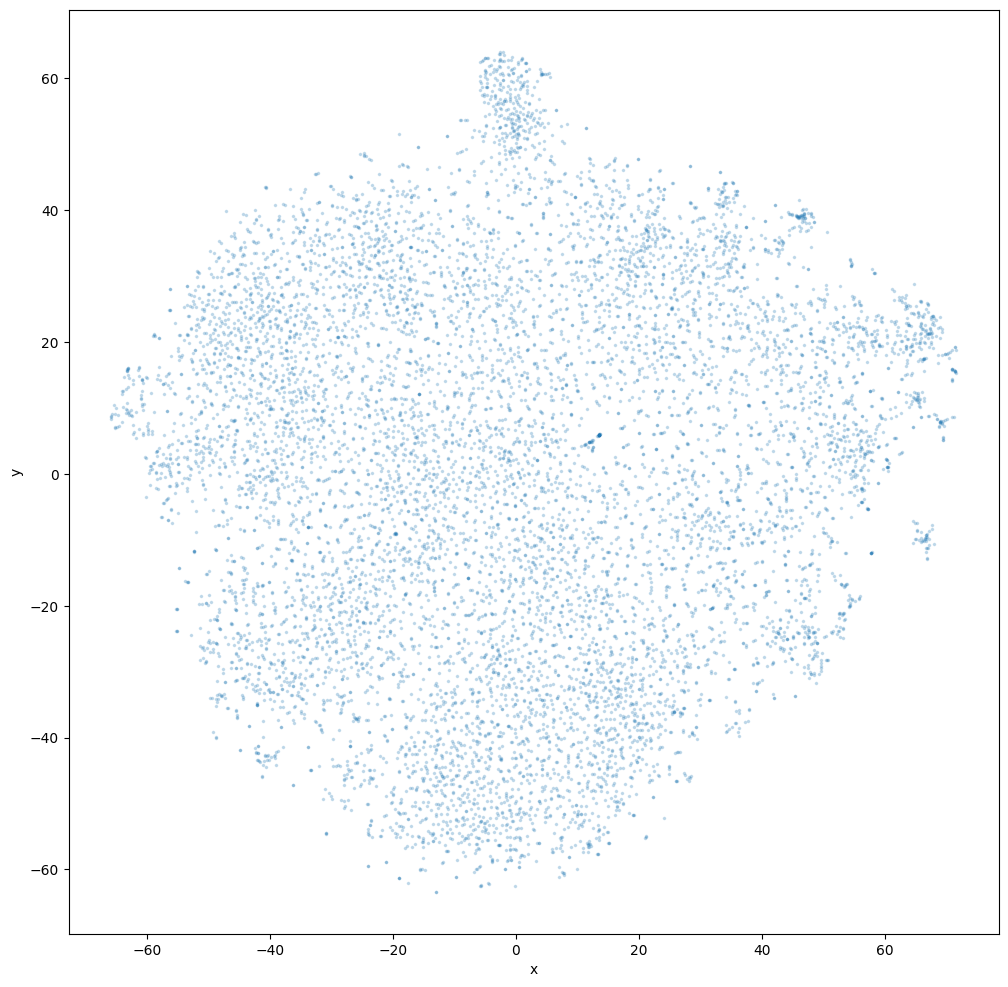

In [43]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)


In [44]:
# call Bokeh library function

# to allow us to inspect the words interactively

output_notebook()


In [45]:
subset_df = coords_df.sample(n=1000)


In [46]:
p = figure(width=800, height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [47]:
show(p)
